In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import roc_curve

In [12]:
dataset = pd.read_csv('mRNA_Protein33.txt',sep='\t')
col = dataset.columns.values.tolist()

In [13]:

def evaluation_analysis(true_label,predicted,predicted_prob,model): 
    sens=round((metrics.recall_score(true_label,predicted,pos_label=1)),3)
    spec=round((metrics.recall_score(true_label,predicted,pos_label=0)),3)
    precision=round((metrics.precision_score(true_label,predicted)),3)
    MCC=round((metrics.matthews_corrcoef(true_label,predicted)),3)
    F_score=2*(precision*sens)/(precision+sens)
    ACC=round((metrics.accuracy_score(predicted, true_label)),3)
    AUC=round((metrics.roc_auc_score(data_y,predicted_prob)),3)

    print("Evaluation Analysis of Model:")
    print("Sensitivity: {}".format(sens))
    print("Specificity: {}".format(spec))
    print("Precision: {}".format(precision))
    print("Matthews correlation coefficient(MCC): {}".format(MCC))
    print("F_score: {}".format(F_score))
    print("Accuracy: {}".format(ACC))
    print("ROC&AUC: {}".format(AUC))

    plt.figure(facecolor='skyblue')
    plt.rcParams['axes.facecolor'] = 'white'
    yhat = predicted_prob
    pos_pred = predicted_prob
    plt.plot([0,1], [0, 1], linestyle='--', label='Reference')
    fpr, tpr, _ = roc_curve(data_y, pos_pred)
    plt.plot(fpr, tpr, marker='.', label=model,color='red')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()


Evaluation Analysis of Model:
Sensitivity: 0.857
Specificity: 1.0
Precision: 1.0
Matthews correlation coefficient(MCC): 0.909
F_score: 0.9229940764674206
Accuracy: 0.97
ROC&AUC: 0.967


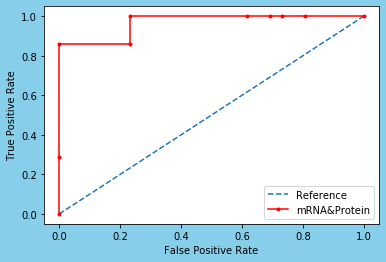

In [14]:
#-----------mRNA&Protein model------------#
data_x = np.array(dataset[col[1:16]])
data_y = dataset['Recurrence']
model="mRNA&Protein"
clf = xgb.XGBClassifier( n_estimators=100,
                        colsample_bytree=0.5,
                          subsample=0.8, #0.8
                          learning_rate=0.5, #0.5
                         objective='binary:logistic',
                          gamma=0.2,
                         
                         random_state=7,use_label_encoder =False, eval_metric='mlogloss'
                          )
loocv = LeaveOneOut()
predicted = cross_val_predict(clf, data_x, data_y,cv=loocv)
predicted_prob = cross_val_predict(clf, data_x, data_y, cv=loocv, method='predict_proba')[:,1]
evaluation_analysis(data_y,predicted,predicted_prob,model)

Evaluation Analysis of Model:
Sensitivity: 0.714
Specificity: 0.962
Precision: 0.833
Matthews correlation coefficient(MCC): 0.716
F_score: 0.7689230769230768
Accuracy: 0.909
ROC&AUC: 0.907


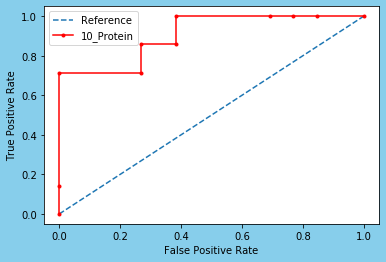

In [15]:
#-----------10-Protein model------------#
data_x = np.array(dataset[col[1:11]])
data_y = dataset['Recurrence']
model="10_Protein"
clf = xgb.XGBClassifier( n_estimators=100,
                         objective='binary:logistic',
                         learning_rate=0.09,
                         random_state=8,use_label_encoder =False, eval_metric='mlogloss'
                        )
loocv = LeaveOneOut()
predicted = cross_val_predict(clf, data_x, data_y,cv=loocv)
predicted_prob = cross_val_predict(clf, data_x, data_y, cv=loocv, method='predict_proba')[:,1]
evaluation_analysis(data_y,predicted,predicted_prob,model)

Evaluation Analysis of Model:
Sensitivity: 0.286
Specificity: 0.923
Precision: 0.5
Matthews correlation coefficient(MCC): 0.262
F_score: 0.3638676844783715
Accuracy: 0.788
ROC&AUC: 0.742


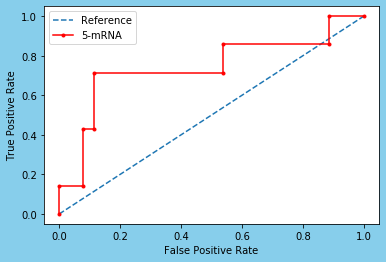

In [16]:
#-----------mRNA model------------#
data_x = np.array(dataset[col[11:16]])
data_y = dataset['Recurrence']
model="5-mRNA"
clf = xgb.XGBClassifier(n_estimators=50,
                        max_depth=2,
                         learning_rate=0.08,
                          colsample_bytree=0.5,
                           subsample=0.75,
                           #min_child_weight=1,
                          scale_pos_weight=2,
                           objective='binary:logistic',
                         gamma=0.8,
                         random_state=8,use_label_encoder =False, eval_metric='mlogloss')
loocv = LeaveOneOut()
predicted = cross_val_predict(clf, data_x, data_y,cv=loocv)
predicted_prob = cross_val_predict(clf, data_x, data_y, cv=loocv, method='predict_proba')[:,1]
evaluation_analysis(data_y,predicted,predicted_prob,model)